This notebook is targeted at finding the optimum time of travelling between two stations. We extracted some locational data from a github repository https://github.com/naomistuart/sydneytrains. We simplified the train problem so that only one connection between 2 neighbouring stations was made and didn't account for live data, train boarding times or delays. We generated our data to also include services that would occasionally skip multiple stations. These lines are expected to be chosen as the optimum path unless another route is found. This notebook will use A star search to determine the optimum route between two stations. 

---




Run these code blocks if you are running this on google collab. If you are running this on a local notebook, ignore this section. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


This should change the folder which this program can access. 


In [ ]:
cd drive/MyDrive/Winton\ -\ A\ \*

/content/drive/MyDrive/Winton - A *


Make sure that A star related python scripts, heading_v3.py, utils.py, graphProblem.py can be accessed by the notebook.


In [ ]:
ls

' Assignment 1 Trains Problem - A STAR search'   Data/             __pycache__/
 AStar_for_graph.py                              graphProblem.py   utils.py
 AStar.py                                        heading_v3.py


---
These are all the import statements are needed for the assignment.



In [ ]:
from heading_v3 import * # Handles most of the graph problem creation and matplotlib WE HAVE ALTERED THIS FILE, PLEASE USE OUR FILE INSTEAD OF THE ORIGINAL HEADING_V3.  
import pandas as pd # Used for most data frame creation. 
import matplotlib.pyplot as plt #Used for ploting and helping with visual outputs. 

Set file locations for the excel spread sheets of interest.



In [ ]:
data_NODES = 'Data/nodeLocations.xlsx' 
data_EDGES = 'Data/TrainPairs.xlsx'

Read both files and store it into a data frame. This way it can be read like a table.

In [ ]:
dfNODES = pd.read_excel(data_NODES) # This variable will store all our station details needed for the nodes in our graph. 
dfNODES.head() # Makes sure that the file is either reachable or readable.

,LocationName,LocationX,LocationY
0,Allawah,151.1145,-33.969730
1,Arncliffe,151.1472,-33.936782
2,Artarmon,151.1847,-33.808542
3,Ashfield,151.1259,-33.887638
4,Asquith,151.1082,-33.688524


In [ ]:
dfEDGES = pd.read_excel(data_EDGES) # This variable will store all our station connection details for the edges in our graph.
dfEDGES.head() # Makes sure that the file is either reachable or readable.

,City Name,Allawah,Arncliffe,Artarmon,Ashfield,Asquith,Auburn,Banksia,Bankstown,Bardwell Park,...,West Ryde,Westmead,Wiley Park,Windsor,Wolli Creek,Wollstonecraft,Woolooware,Wynyard,Yagoona,Yennora
0,Allawah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arncliffe,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,Artarmon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashfield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asquith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This code will load the nodes into a list so we can pass it through define_graph() function later on. 


In [ ]:
nodes = []
node = []
name = dfNODES["LocationName"]
location = (dfNODES["LocationX"],dfNODES["LocationY"])

for x1,x2 in zip(dfNODES["LocationName"],zip(dfNODES["LocationX"],dfNODES["LocationY"])):
    node.append(x1)
    node.append(x2)
    nodes.append(node)
    node=[]

Storing the list of lists of edge relationships between the nodes. 

In [ ]:
totalRelations=[] 
relations = []
relation = []

for i in range (dfEDGES.shape[0]-1):
    x = dfEDGES.iloc[i,:]
    relationKey=(x[0])
    for j in range (1,dfEDGES.shape[1]):
        if (j>i and x[j] != 0 ):
            relation.append([dfEDGES.columns[j],x[j]])
    if (len(relation) != 0):
        relations = [relationKey, relation]
        totalRelations.append(relations)

    relation =[]
    relations=[]

We call define_graph(edges, nodes, True) so we can generate an environment for our agent to search. 

In [ ]:
train_graph_data, train_graph = define_graph(totalRelations, nodes, True)

This should show the real map locations of each station and their connections between the nodes. There is a total of 170 stations in our problem. 


{'Allawah': 'white', 'Arncliffe': 'white', 'Artarmon': 'white', 'Ashfield': 'white', 'Asquith': 'white', 'Auburn': 'white', 'Banksia': 'white', 'Bankstown': 'white', 'Bardwell Park': 'white', 'Beecroft': 'white', 'Belmore': 'white', 'Berala': 'white', 'Berowra': 'white', 'Beverly Hills': 'white', 'Bexley North': 'white', 'Birrong': 'white', 'Blacktown': 'white', 'Bondi Junction': 'white', 'Burwood': 'white', 'Cabramatta': 'white', 'Campbelltown': 'white', 'Campsie': 'white', 'Canley Vale': 'white', 'Canterbury': 'white', 'Caringbah': 'white', 'Carlton': 'white', 'Carramar': 'white', 'Casula': 'white', 'Central': 'white', 'Chatswood': 'white', 'Cheltenham': 'white', 'Chester Hill': 'white', 'Circular Quay': 'white', 'Clarendon': 'white', 'Clyde': 'white', 'Como': 'white', 'Concord West': 'white', 'Cronulla': 'white', 'Croydon': 'white', 'Denistone': 'white', 'Domestic Airport': 'white', 'Doonside': 'white', 'Dulwich Hill': 'white', 'East Hills': 'white', 'East Richmond': 'white', 'Eastw

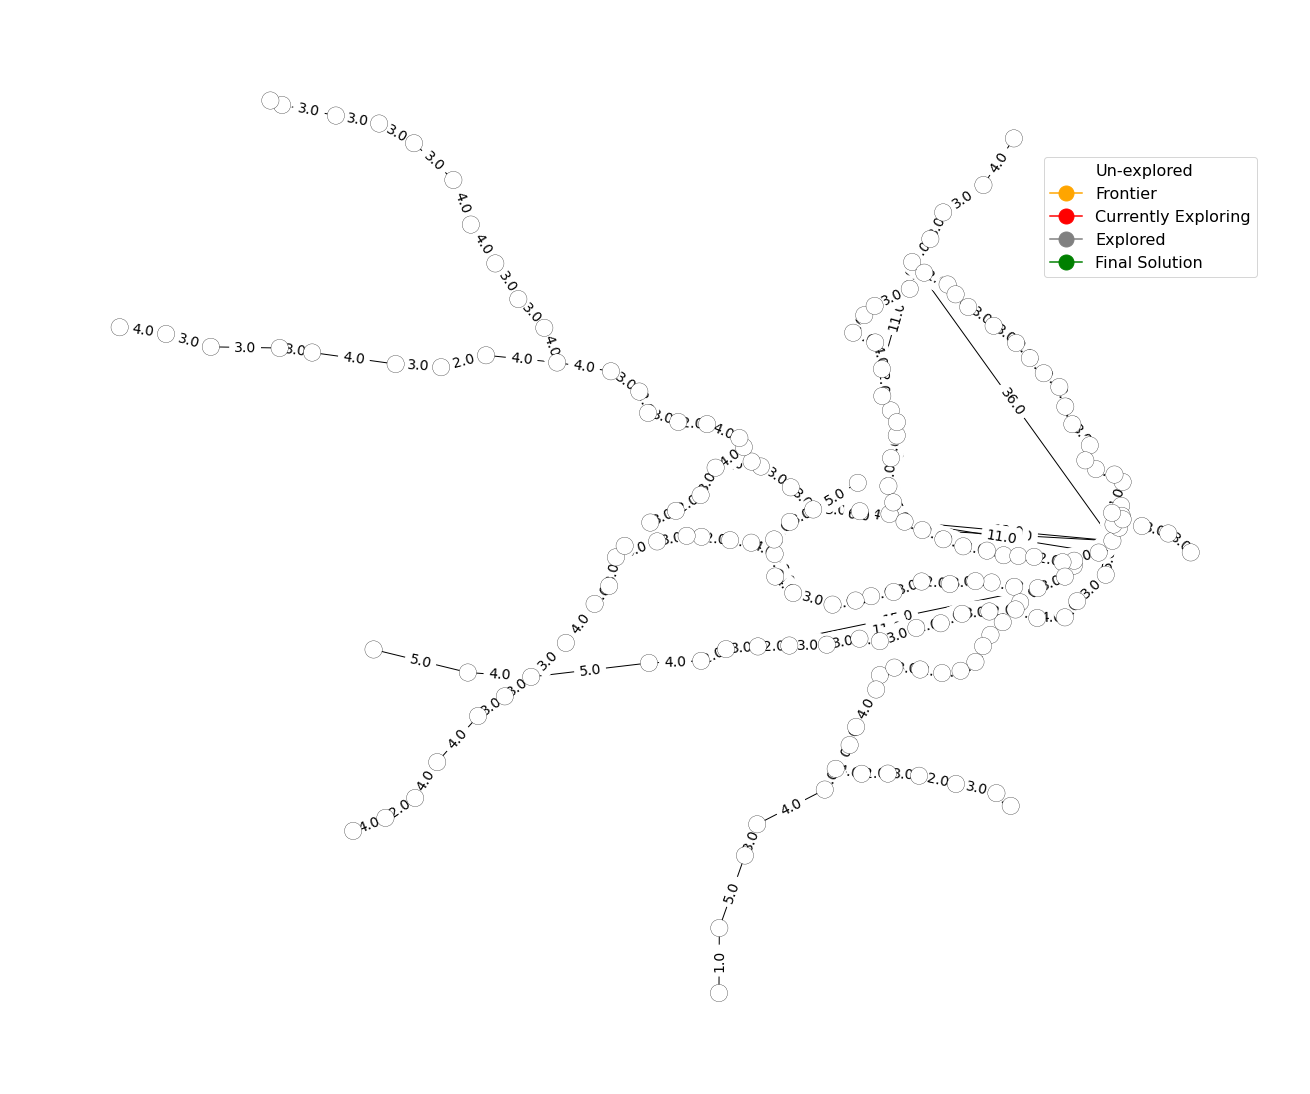

In [ ]:
show_graph(train_graph_data)

This should get user inputs to always match a station otherwise it will prompt the user to try agian. 

In [ ]:
def first_station():
  userinput = input("First Station is: ")
  for item in dfNODES["LocationName"]:
    if userinput.lower() == item.lower():
      return item      
  print(f"Sorry, you typed in {userinput}, have a look again at our station list!")
  return first_station()   

def second_station():
  userinput = input("Second Station is: ")
  for item in dfNODES["LocationName"]:
    if userinput.lower() == item.lower():
      return item
  print(f"Sorry, you typed in {userinput}, have a look again at our station list!")
  return second_station()


`This will create the problem of interest. Here is our list of stations you can choose from:`

**Allawah, Arncliffe, Artarmon, Ashfield, Asquith, Auburn, Banksia, Bankstown, Bardwell Park, Beecroft, Belmore, Berala, Berowra, Beverly Hills, Bexley North, Birrong, Blacktown, Bondi Junction, Burwood, Cabramatta, Campbelltown, Campsie, Canley Vale, Canterbury, Caringbah, Carlton, Carramar, Casula, Central, Chatswood, Cheltenham, Chester Hill, Circular Quay, Clarendon, Clyde, Como, Concord West, Cronulla, Croydon, Denistone, Domestic Airport, Doonside, Dulwich Hill, East Hills, East Richmond, Eastwood, Edgecliff, Edmondson Park, Emu Plains, Engadine, Epping, Erskineville, Fairfield, Flemington, Glenfield, Gordon, Granville, Green Square, Guildford, Gymea, Harris Park, Heathcote, Helensburgh, Holsworthy, Homebush, Hornsby, Hurlstone Park, Hurstville, Ingleburn, International Airport, Jannali, Killara, Kings Cross, Kingsgrove, Kingswood, Kirrawee, Kogarah, Lakemba, Leightonfield, Leppington, Leumeah, Lewisham, Lidcombe, Lindfield, Liverpool, Loftus, Macarthur, Macdonaldtown, Macquarie Fields, Marayong, Marrickville, Martin Place, Mascot, Meadowbank, Merrylands, Milsons Point, Minto, Miranda, Mortdale, Mount Colah, Mount Druitt, Mount Kuring-gai, Mulgrave, Museum, Narwee, Newtown, Normanhurst, North Strathfield, North Sydney, Oatley, Olympic Park, Padstow, Panania, Parramatta, Pendle Hill, Pennant Hills, Penrith, Penshurst, Petersham, Punchbowl, Pymble, Quakers Hill, Redfern, Regents Park, Revesby, Rhodes, Richmond, Riverstone, Riverwood, Rockdale, Rooty Hill, Roseville, Schofields, Sefton, Seven Hills, St James, St Leonards, St Marys, St Peters, Stanmore, Strathfield, Summer Hill, Sutherland, Sydenham, Tempe, Thornleigh, Toongabbie, Town Hall, Turramurra, Turrella, Villawood, Vineyard, Wahroonga, Waitara, Warrawee, Warwick Farm, Waterfall, Waverton, Wentworthville, Werrington, West Ryde, Westmead, Wiley Park, Windsor, Wolli Creek, Wollstonecraft, Woolooware, Wynyard, Yagoona, Yennora**

The code has made it so your inputs don't have to be case sensitive but do make sure spaces are included as they should. 

In [ ]:
trainproblem = GraphProblem('St Marys','Panania',train_graph)

Now our problem is defined, we will import the libraries needed to 1) Generate a text solution or 2) Generate a visual solution. 

In [ ]:
from AStar import *  #Needed for A star text solution
AStar = AStar_algorithm() #Shorthanding function calls


from AStar_for_graph import * #Needed for A star visual solution
AStar_for_graph = AStar_algorithm_for_graph() #Shorthanding function calls

These are the heuristics we decided to go with. It made the most sense to use Euclidean distance for our problem as it would be beneficial to minimise the distance between the start and end goals. 

In [ ]:
def euclidean_distance(x, y):
    return np.sqrt(sum((_x - _y) ** 2 for _x, _y in zip(x, y)))


In [ ]:
def heuristic_fun_euclidean(x, problem):
    locs = getattr(problem.graph, 'locations', None)
    if locs:
        if type(problem) is str:
            return int(euclidean_distance(locs[x], locs[problem.goal]))

        return int(euclidean_distance(locs[x.state], locs[problem.goal]))
    else:
        return np.inf

This variable will perform the function call of heuristic_fun_euclidean. 

In [ ]:
function = lambda x: heuristic_fun_euclidean(x,trainproblem)

This is the text solution generated from the start node to end node. 

In [ ]:
display_result(trainproblem, AStar(function),train_graph)

Algorithm: AStar
 Iteration times : 239  Path : [<Node St Marys>, <Node Mount Druitt>, <Node Rooty Hill>, <Node Doonside>, <Node Blacktown>, <Node Seven Hills>, <Node Toongabbie>, <Node Pendle Hill>, <Node Wentworthville>, <Node Westmead>, <Node Parramatta>, <Node Harris Park>, <Node Granville>, <Node Clyde>, <Node Auburn>, <Node Lidcombe>, <Node Strathfield>, <Node Redfern>, <Node Sydenham>, <Node Revesby>, <Node Panania>]
The time taken for our path is 84.0


This is the visual solution generated from the start node to end node. Make sure that once this has run, that you click visualise to see which nodes are being checked and explored. 

In [ ]:
display_result_for_graph(trainproblem, AStar_for_graph(function), train_graph_data)

Algorithm: AStar_for_graph


interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='Visualize'), Output()), _dom_classes=('widget-int…



---


Unmount the drive if you are viewing this on google collab


In [ ]:
from google.colab import drive
drive.flush_and_unmount()